# Introduction

Let us provide math description of the received signal before we start:

$$ \mathbf{y} = \sqrt{\frac{P}{M_t}}\mathbf{H}\mathbf{s} + \mathbf{n} \qquad (1)$$

where $P$ is the transmitt power, $\mathbf{s}$ is the transmitted symbols, $\mathbf{n}$ is the additive noise and $\mathbf{H}$ is the channel gain (actually, fading process).

The dimensions of the matrix $\mathbf{H}$ are  $M_r\times M_t$, where $M_r$ is the number of the receive antennas and $M_t$ is the number of the transmitt antennas. For several snapshots the channel will have the following view:

![tens](https://raw.githubusercontent.com/kirlf/CSP/master/MIMO/assets/mimo-tensor.png)

> **NOTE:** 
>
>The following structure is used in [MatLab](https://www.mathworks.com/help/comm/ref/comm.mimochannel-system-object.html): 
rows - snapshots, columns - $M_t$, lateral dimension - $M_r$

This formula can be easily redefined for the MISO case:

$$ y = \sqrt{\frac{P}{M_t}}\mathbf{h}\mathbf{s} + n \qquad (2) $$

where the $\mathbf{h}$ is the vector $1 \times M_t$. 

SIMO case:

$$ y = \sqrt{P}\mathbf{h}s + \mathbf{n} \qquad (3) $$

where the $\mathbf{h}$ is the vector $M_r \times 1$.

And SISO case:

$$ y = \sqrt{P}hs + n \qquad (4)$$

Actually, we have considered case when the channel is **unknown** for the transmitter (**open loop**: transmission without feedback). In other words, we do not prefer any direction and transmit equal power through all of the antennas (paths). Hence, the path gains are equal to 1:

$$ \gamma_i=1, \quad i=1,2,..M_t \qquad (5)$$

What is the path gain? Path gain or antenna weight means allocation of the output power proportionaly to the strength of the certein path:

$$s_i = \gamma_i d_i \quad i=1,2,..M_t \qquad (6)$$

where $d_i$ is the one of the initial synbols ($E\{\mathbf{d}\mathbf{d}^H\} = M_t$ - total transmit energy constrain). 
>**NOTE THAT**:
> 
>The antenna weights are also constrained by the number of trasmit antennas:
>$\sum^r_{i=1} \gamma_i = M_t$ (where $r$ is the rank of the channel matrix.). 

In other words, we  allocate more power to the good channels (paths) and less power to the bad pathes.

How to allocate power efficiently?

If the channel is **known** (**closed-loop** scenario - with a feedback) for the transmitter we can use advanced scenarios of the transmission with some **pre-coding** and **post-processing** algorithms (e.g., some linear approaches).

What do the last termins mean?

If we know the **CSI** (Channel State Information - matrix $\mathbf{H}$), we can process the channel matrix. 

E.g., apply the [Singular Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition).

![svd](https://raw.githubusercontent.com/kirlf/CSP/master/MIMO/assets/svd-mimo.png)


In this case, linear pre-coding (filter) matrix is the $\mathbf{F} = \mathbf{V}_s$ and the linear post-processing (demodulator) matrix $\mathbf{D} = \mathbf{U}^H_s$ (where "power" H means Hermitian). Obviously, that for channel-uncknown case $\mathbf{F}$ and $\mathbf{D}$ are equal to [identity matrices](https://en.wikipedia.org/wiki/Identity_matrix).


Redefine the received signal model:

$$ \mathbf{Dy} = \mathbf{D}\left( \sqrt{\frac{P}{M_t}}\mathbf{H}\mathbf{F}\mathbf{s} + \mathbf{n} \right) = \mathbf{U}^H_s\mathbf{y} = \sqrt{\frac{P}{M_t}}\mathbf{U}^H_s\mathbf{H}\mathbf{V}_s\mathbf{s}+\mathbf{U}^H_s\mathbf{n} = \sqrt{\frac{P}{M_t}}\mathbf{\Sigma}_s\mathbf{s} + \mathbf{\hat{n}} = \mathbf{\hat{y}}\qquad (7)$$

Note that:
1. $\mathbf{\hat{n}}$ has the same statistical properties as the $\mathbf{n}$;
2. Eigen values of the $\mathbf{HH}^H$ are the squared singular values of the channel matrix $\mathbf{H}$ ($\sigma_i = \sqrt{\lambda_i}$).

Schematically this can be represented as:
<img src="https://raw.githubusercontent.com/kirlf/CSP/master/MIMO/assets/pre-code-post-proc.png" alt="sch" width="500" height="600">
> Fig.1. Schematic of modal decomposition of H when the channel is known to the transmitter
and receiver \[1, p.67\].

Actually, these routines allow to consider MIMO channel as the set of the $r$ parallel SISO channels. 
<img src="https://raw.githubusercontent.com/kirlf/CSP/master/MIMO/assets/parall-siso.png" alt="parall" width="500" height="600">
> Fig.2. Schematic of modal decomposition of H when the channel is known to the transmitter
and receiver \[1, p.67\].

### Task №1
Considered approach woorks well for MIMO case. However, what about other configurations: SIMO, MISO, SISO?

# Capacity as the Information theory term

![cap1](https://raw.githubusercontent.com/kirlf/CSP/master/MIMO/assets/capacity-1.jpg)
![cap2](https://raw.githubusercontent.com/kirlf/CSP/master/MIMO/assets/capacity-2.jpg)

**Let us repeat**: 

Channel capasity of the MIMO channel can be considered as the sum of the channel capacity of the  SISO channels.

This phenomena belongs to the **spatial multiplexing** (SM) concept. Furthermore, term **spatial multiplexing gain** is frequently used. This term means how much MIMO implementation increases in the transmission rate (or capacity) for the same bandwidth and with no additional power expenditure. By the formulas, we can say that the SM gain directly depends on the channel matrix rank.

# Water-pouring algorithm 

As we can see from the formula of the channel-known capacity the maximazation problem should be solved. **Water-pouring** (water-filling) algorithm can be applied \[1, p.68-69\]:

In [1]:
import numpy as np
from numpy import linalg as LA
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
def waterpouring(Mt, SNR_dB, H_chan):
    SNR = 10**(SNR_dB/10)
    r = LA.matrix_rank(H_chan)
    H_sq = np.dot(H_chan,np.matrix(H_chan, dtype=complex).H)
    lambdas = LA.eigvals(H_sq) 
    lambdas = np.sort(lambdas)[::-1]
    p = 1;
    gammas = np.zeros((r,1))
    flag = True
    while flag == True:
        lambdas_r_p_1 = lambdas[0:(r-p+1)]
        inv_lambdas_sum =  np.sum(1/lambdas_r_p_1)
        mu = ( Mt / (r - p + 1) ) * ( 1 + (1/SNR) * inv_lambdas_sum)
        for idx, item in enumerate(lambdas_r_p_1):
            gammas[idx] = mu - (Mt/(SNR*item))
        if gammas[r-p] < 0: #due to Python starts from 0
            gammas[r-p] = 0 #due to Python starts from 0
            p = p + 1
        else:
            flag = False
    res = []
    for gamma in gammas:
        res.append(float(gamma))
    return np.array(res)

In [3]:
#Test
Mt = 3
SNR_db = 10
H_chan = np.array([[1,0,2],[0,1,0], [0,1,0]], dtype = float)
gammas = waterpouring(Mt, SNR_db, H_chan)
print('Rank of the matrix: '+str(LA.matrix_rank(H_chan)))
print('Gammas:\n'+str(gammas))

Rank of the matrix: 2
Gammas:
[1.545 1.455]


# Short comparison

In [4]:
def openloop_capacity(H_chan, SNR_dB):
    SNR = 10**(SNR_dB/10)
    Mt = np.shape(H_chan)[1]
    H_sq = np.dot(H_chan,np.matrix(H_chan, dtype=complex).H)
    lambdas = LA.eigvals(H_sq) 
    lambdas = np.sort(lambdas)[::-1]
    c = 0
    for eig in lambdas:
        c = c + np.log2(1 + SNR*eig/Mt)
    return np.real(c)

Mr = 4
Mt = 4
H_chan = (np.random.randn(Mr,Mt) + 1j*np.random.randn(Mr, Mt))/np.sqrt(2) #Rayleigh flat fading
c = openloop_capacity(H_chan, 10)
print(c)   

11.52330534603422


In [5]:
def closedloop_capacity(H_chan, SNR_dB):
    SNR = 10**(SNR_dB/10)
    Mt = np.shape(H_chan)[1]
    H_sq = np.dot(H_chan,np.matrix(H_chan, dtype=complex).H)
    lambdas = LA.eigvals(H_sq) 
    lambdas = np.real(np.sort(lambdas))[::-1]
    c = 0
    gammas = waterpouring(Mt, SNR_dB, H_chan)
    for idx, item in enumerate(lambdas):
        c = c + np.log2(1+ SNR*item*gammas[idx]/Mt)
    return np.real(c)

c = closedloop_capacity(H_chan, 10)
print(c)  

11.827653818433925


### Task №2:

Solve the tasks from [the sample of the test exam](https://eb39cd48-a-62cb3a1a-s-sites.googlegroups.com/site/grintmimo/news/podgotovkakekzamenu/MoCo_SS15_kazan_sample.pdf?attachauth=ANoY7cr1rV8Auf5K9LB3_TUNFD6nGfkS6ISrds5BPwENtdL43btKXYU5VxtaxBM6d-LNh55KD2rAfKQeOx2n2Hr74RUbXF6-RrQRDIB_sOfYIXVa0bCO5iyTbigQn_GOrZNr7ST5o1oKI7rIrMp834zw1OtBN2il5JU6gocCu7_93gdISYeJ9GLplrZCoHkiE2JPfYlMScllFACcECgHfUInI77Funi50WFBY4w2ilsQtHDP8q95BSvKzcHol7H_mLClYhBmR0ad&attredirects=0). Solve the bonus task also. 

### Task №3

What is the optimal power distribution $\gamma^{opt}_1$, $\gamma^{opt}_2$ across the three eigenmodes for $SNR \to +\infty$ and for $SNR \to -\infty$ (logarithmic scale)?

# Ergodic capacity

As you can see from the comparison examples we are working with the random processes. And, frankly speaking, it is little bit wrong to estimate something of the random processes by the only one realization. We need some averaging by the set of realizations.

**Ergodic capacity** can be calculated if the channel is not variable in statistical meaning:

$$ \hat{C} = E\left\{ C \right\} \qquad (8) $$

where $E\{*\}$ denotes the expected value.




In [6]:
Mr = 4
Mt = 4
counter = 1000
SNR_dBs = [i for i in range(1, 21)]
C_open = np.empty((len(SNR_dBs), counter))
C_closed = np.empty((len(SNR_dBs), counter))

for c in range(counter):
    H_chan = (np.random.randn(Mr,Mt) + 1j*np.random.randn(Mr, Mt))/np.sqrt(2)
    for idx, SNR_dB in enumerate(SNR_dBs):
        C_open[idx, c] = openloop_capacity(H_chan, SNR_dB)
        C_closed[idx, c] = closedloop_capacity(H_chan, SNR_dB)
    
C_open_erg = np.mean(C_open, axis=1)
C_closed_erg = np.mean(C_closed, axis=1)

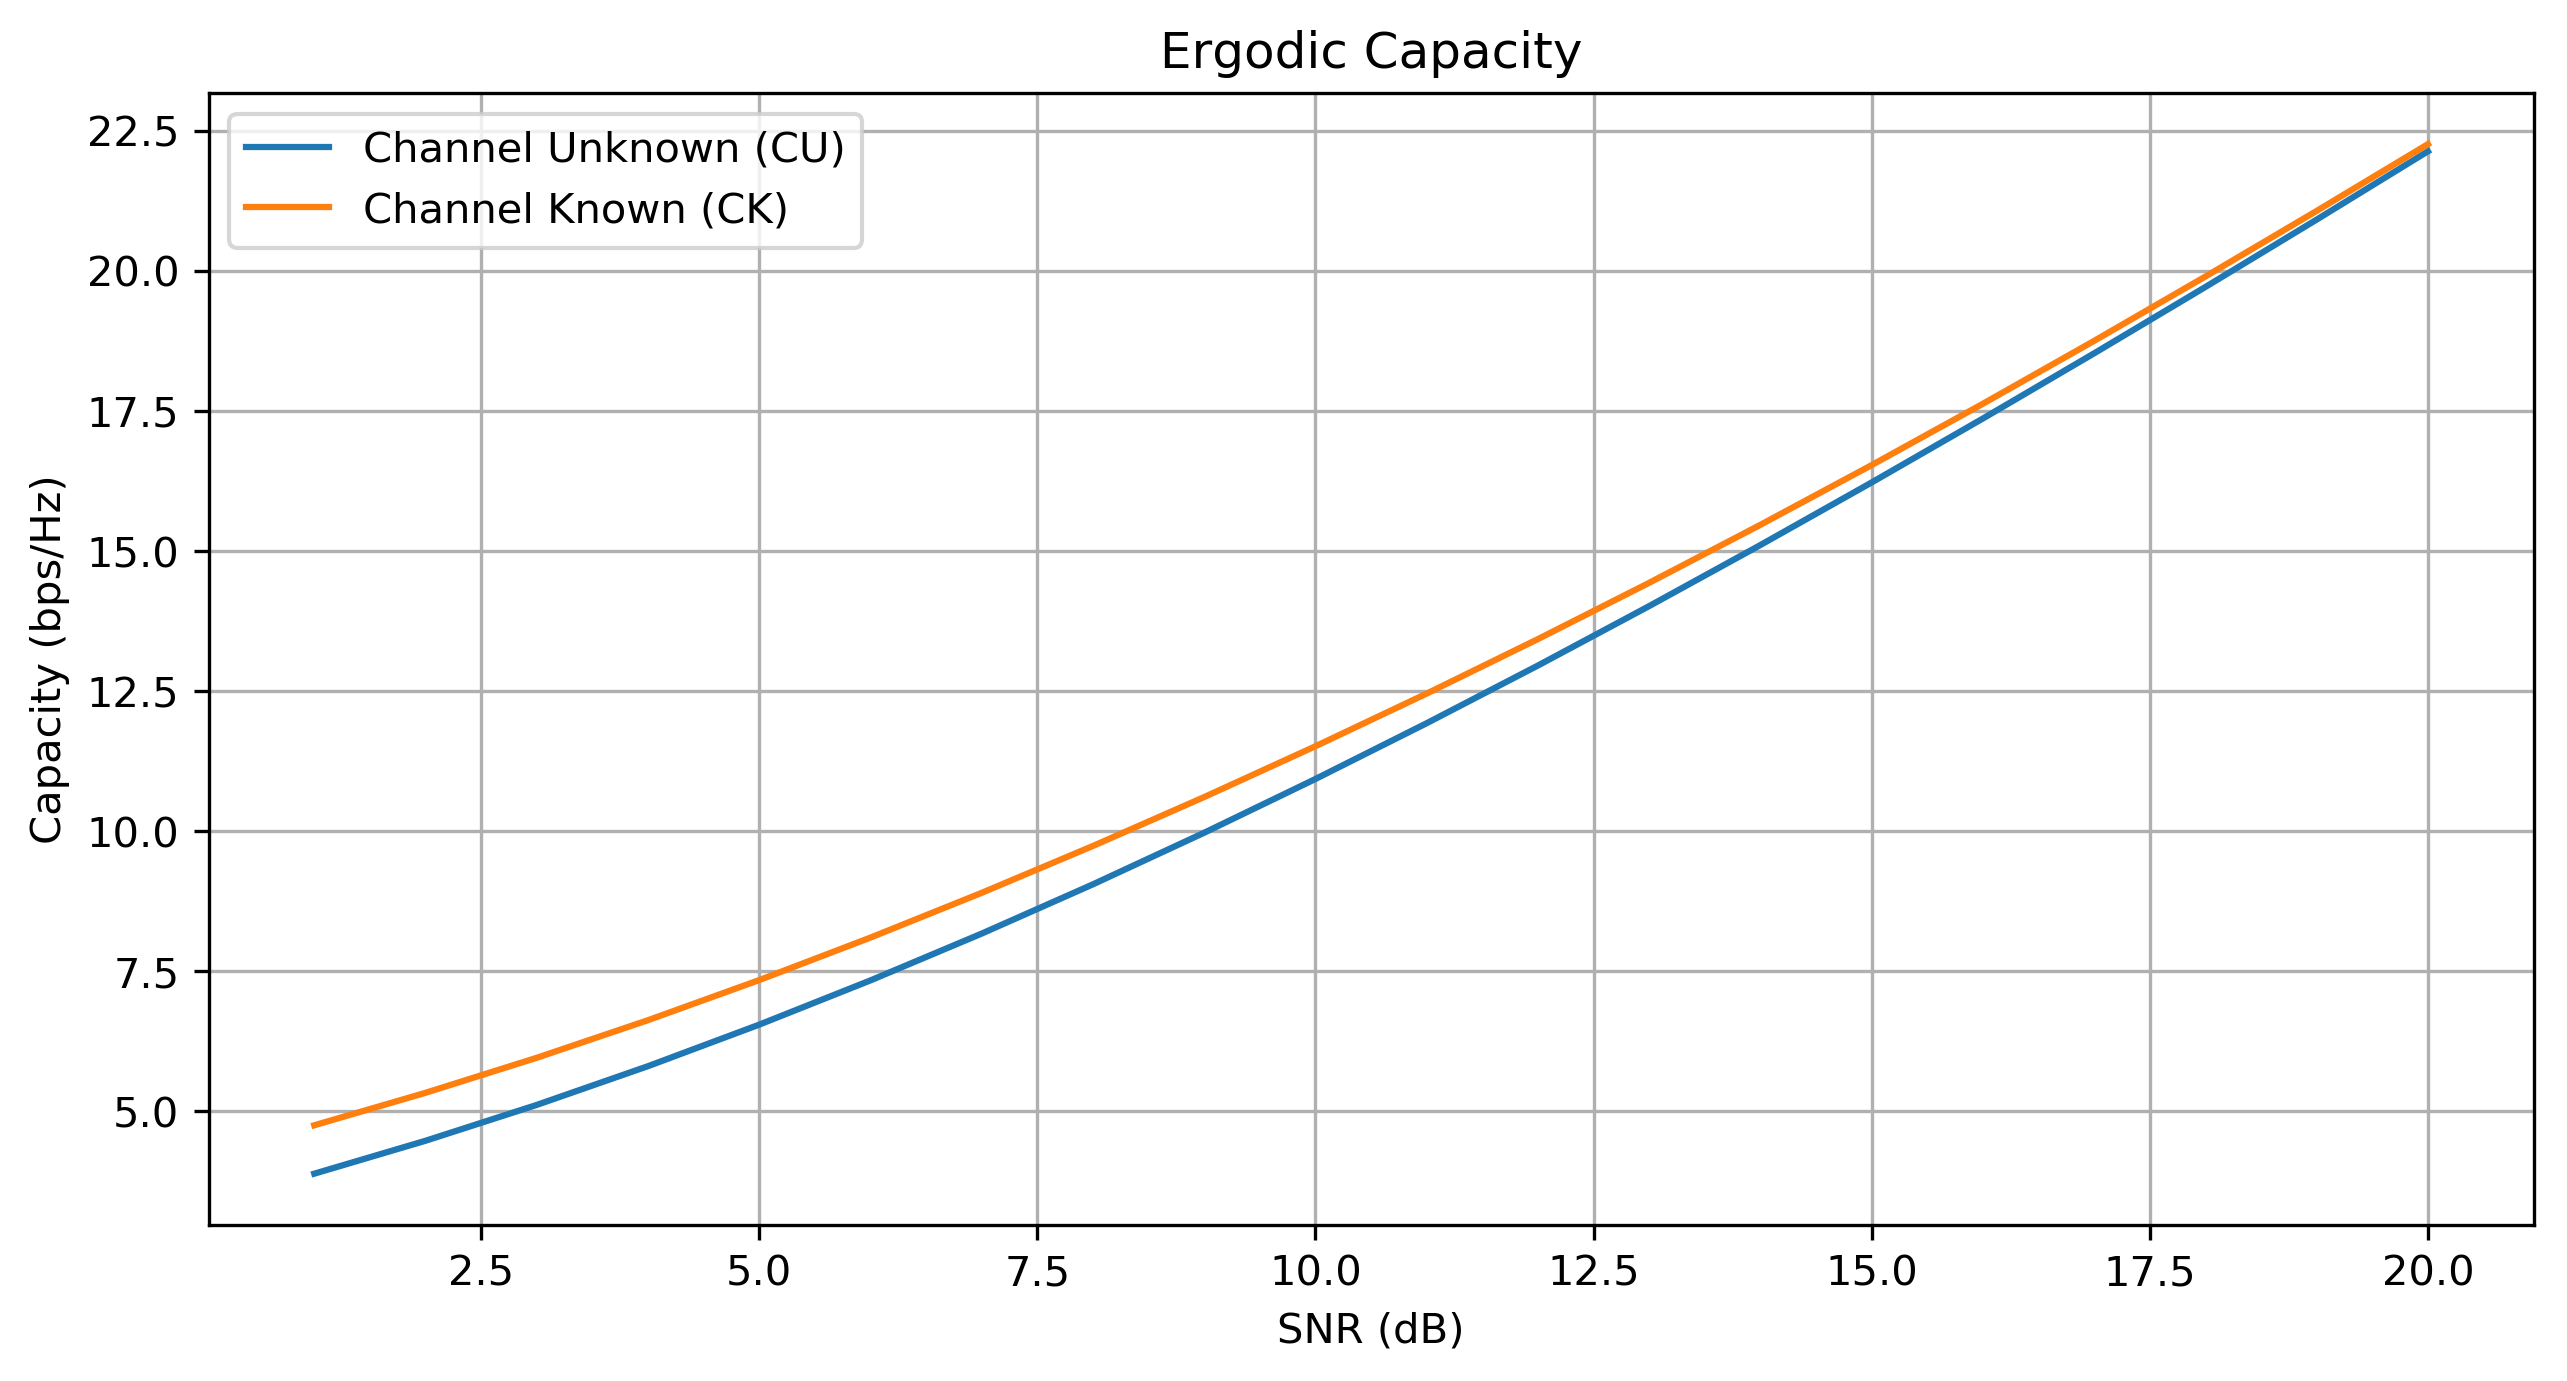

In [7]:
fig = plt.figure(figsize=(10, 5), dpi=300)
plt.plot(SNR_dBs, C_open_erg, label='Channel Unknown (CU)')
plt.plot(SNR_dBs, C_closed_erg, label='Channel Known (CK)')
plt.title("Ergodic Capacity")
plt.xlabel('SNR (dB)')
plt.ylabel('Capacity (bps/Hz)')
plt.legend()
plt.grid()
plt.show()

# Outage capacity

Additionaly, the knowledge about outage capacity is required in some cases. Let us just quote \[1, p. 75\]:

> Outage analysis quantifies the level of performance (in this case capacity) that is guaranteed with a certain level of reliability. We define the $q$% outage capacity $C_{out}$,$q$ as the information rate that is guaranteed for $(100 − q)$% of the channel realizations, i.e., $P(C ≤ C_{out,q})$ = $q$%.

![out](https://raw.githubusercontent.com/kirlf/CSP/master/MIMO/assets/outage.png)
> Fig.3. 10% outage capacity for different antenna configurations. Outage capacity improves with larger antenna configurations \[1, p. 75\].

In other words **outage capacity** is the guaranted capacity for the certain percentage of the channel realizations.


# Reference

1. Paulraj, Arogyaswami, Rohit Nabar, and Dhananjay Gore. 
Introduction to space-time wireless communications. Cambridge university press, 2003.

# Suggested literature

1. Haykin S. Communication systems. – John Wiley & Sons, 2008. - p.366-368